In [31]:
from numpy import *
from scipy.signal import fftconvolve
from scipy.special import ellipk
from numpy.random import normal,multinomial
from scipy.linalg import eigh,eig,circulant,toeplitz
from scipy.sparse.linalg import eigsh
from matplotlib.pyplot import *

def getLambda(n,p,mu):
    
    X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
    J = (triu(X)+triu(X,k=1).T)/sqrt(4*n*p)
    
    k = circulant([-2,1]+(n-3)*[0]+[1])
    # L = kron(k,eye(int(sqrt(n)))) + kron(eye(int(sqrt(n))),k)
    L = k

    J = J*mu + (1-mu)*L
    return eigh(J,eigvals_only=True)

# arcsine distribution
def p(x,delta=1e-5):
    x = (x+2)/2
    if abs(x)<1-delta:
        return 1.0/sqrt(1.0-x**2)/(2*pi)
    else :
        return 0.0
p = vectorize(p)

# semicircle distribution
def W(x,delta=1e-5):
    if abs(x)<2-delta:
        return sqrt(4.0-x**2) / (2*pi)
    else :
        return 0.0
W = vectorize(W)

def density(x,y):
    y,bins=histogram(array(y).flatten(),bins=x,density=True)
    x,dx = (bins[1:]+bins[:-1])/2 , (bins[1:]-bins[:-1])/2

    return x,y,dx

In [3]:
def interaction(n,p):
    
    X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
    J = (triu(X)+triu(X,k=1).T)/sqrt(4*n*p)
    return eigh(J,eigvals_only=True),J

In [4]:
for p in arange(0.01,0.1,0.01):
    Lambda = [ interaction(500,p) for _ in xrange(10) ]
    x = arange(-2,2,0.05)

    x,y,dx = density(x,Lambda)
    color=cm.YlOrRd(1-10*p)
    fill_between(x,y,alpha=0.1,color=color)
    plot(x,y,color=color)
    ylim(0,1.5)

ValueError: could not broadcast input array from shape (500,500) into shape (500)

In [34]:
# calculate it
Lambda = []
for mu in [0.1,0.25,0.5,0.75,0.9][::-1] :
    Lambda += [[ getLambda(64**2,0.5,mu) for _ in xrange(5) ]]

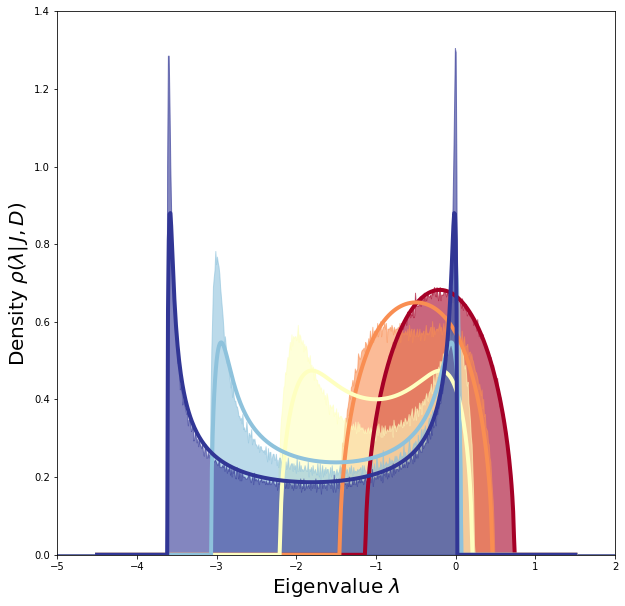

In [38]:
# modified mckay distribution
# def K(x,mu,delta=1e-5):
#     x = x - 2*mu + 2
    
#     s = (mu-1.0/2.0)**2 + 3.0/4.0
#     x = x / s**(1.1)
#     if abs(x)<2-delta:
#         return sqrt(4.0-x**2) / (2*pi) / ( 2-mu-(mu-1)/(mu-2)*x**2 ) / s
#     else :
#         return 0.0
# K = vectorize(K)

# show us
figure(figsize=(10,10))
x = arange(-9,3,0.01)
for i,mu in enumerate([0.0,0.25,0.5,0.75,1.0]) :
    
    x,y,dx = density(x,Lambda[i])
    color=cm.RdYlBu(mu)
    fill_between(x,y,alpha=0.6,color=color)
    qwerty = yyy[::-1][i]
    plot(arange(-4.5,1.51,0.01),qwerty/sum(qwerty*0.01),color=color,linewidth=4)
    

xlim(-5,2)
ylim(0,1.4)
xlabel(r'Eigenvalue $\lambda$',fontsize=20)
ylabel(r'Density $\rho(\lambda|\,J,D)$ ',fontsize=20);

In [28]:
yyy = array([
    genfromtxt('/home/gszep/'+str(i)+'.csv',
               dtype=float,delimiter=',')[::,1]
 for i in xrange(1,6)])

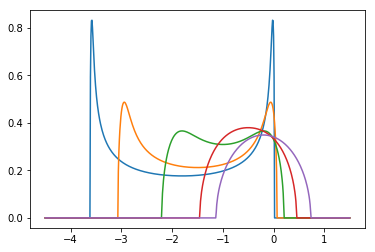

In [29]:
plot(arange(-4.5,1.51,0.01),yyy.T)

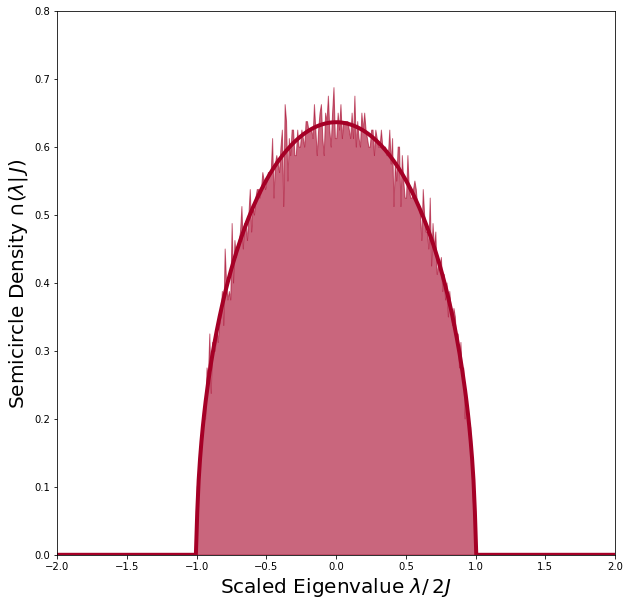

In [61]:
figure(figsize=(10,10))
i = 0; mu = 0
x,y,dx = density(x,[ getLambda(40**2,0.5,1) for _ in xrange(5) ])
color=cm.RdYlBu(mu)
fill_between(x,y,alpha=0.6,color=color)
qwerty = yyy[::-1][i]
plot(x,2*W(x/0.5),color=color,linewidth=4)


xlim(-2,2)
ylim(0,0.8)
xlabel(r'Scaled Eigenvalue $\lambda/\,2J$',fontsize=20)
ylabel(r'Semicircle Density $\cap(\lambda|\,J)$ ',fontsize=20);

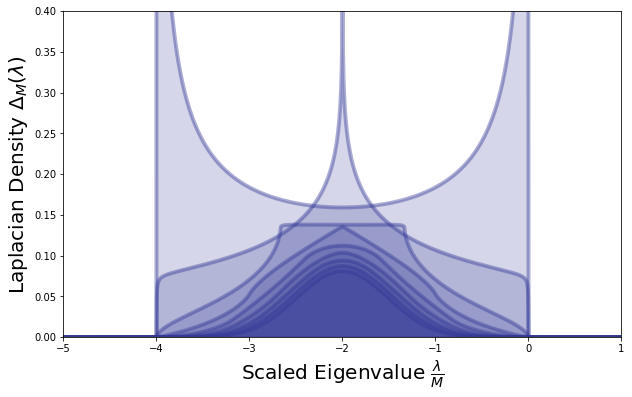

In [62]:
dx = 0.001
x = arange(-100,100,dx)
y = p(x)

figure(figsize=(10,6))
color=cm.RdYlBu(1.0)

plot(x,y,color=color,alpha=0.4,linewidth=4)
fill_between(x,y,color=color,alpha=0.2)


xlim(-5,1); ylim(0,0.4)
xlabel(r'Scaled Eigenvalue $\frac{\lambda}{M}$',fontsize=20)
ylabel(r'Laplacian Density $\Delta_M(\lambda)$ ',fontsize=20)

for M in xrange(2,10):
    y = fftconvolve(p(x),y*dx,mode='same')
    plot(x/M,y,color=color,alpha=0.4,linewidth=4)
    fill_between(x/M,y,color=color,alpha=0.2)



In [37]:
n,p = 3000,0.01
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

n,p = 3000,0.1
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);


n,p = 3000,0.5
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

n,p = 300,0.01
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

n,p = 300,0.1
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);


n,p = 300,0.5
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (triu(X)+triu(X,k=1).T)/sqrt(n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

KeyboardInterrupt: 

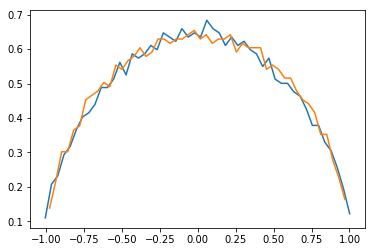

In [152]:
n,p = 2000,0.01
X = argmax( multinomial(1,[p/2,1-p,p/2],size=(n,n)), axis=-1) - 1
J = (-triu(X)+triu(X,k=1).T)/sqrt(4*n*p)

Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

X = normal(size=(n,n))
J = (-triu(X)+triu(X,k=1).T)/sqrt(4*n)
    
Lambda = eigh(J,eigvals_only=True)
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

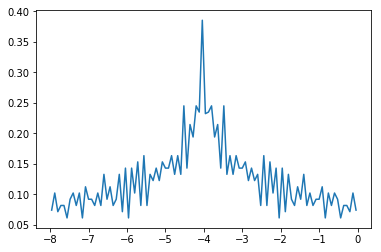

In [25]:
Lambda = [ getLambda(70,0) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

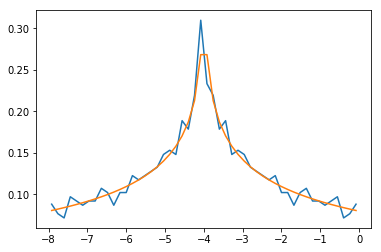

In [34]:
hist,bins=histogram(Lambda,bins=50,density=True)
bins = (bins[:-1]+bins[1:])/2

plot(bins,hist);
plot(bins,lattice(bins));

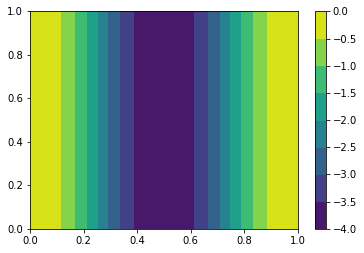

In [47]:
n = 5000
x,y = arange(0,1,0.0001), arange(0,1,0.001)
x,y = meshgrid(x,y)
vals = 2*( cos(2*pi*x)-1 ) #+ 2*( cos(2*pi*y)-1 )

#plot(Lambda[0])
#axhline(0)
contourf(x,y,vals)
colorbar()

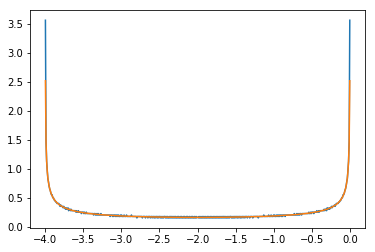

In [48]:
Lambda = vals.flatten()
hist,bins=histogram(Lambda,bins=500,density=True)
dbins = (bins[1:]-bins[:-1])
bins = (bins[:-1]+bins[1:])/2


plot(bins,hist);
#plot(bins,lattice(bins));
plot(bins,d(bins));

In [71]:
sum(d(bins)*dbins[0])

0.9827799663501808

In [69]:
sum(fftconvolve(d(bins),d(bins))*dbins[0])

120.73205778240774

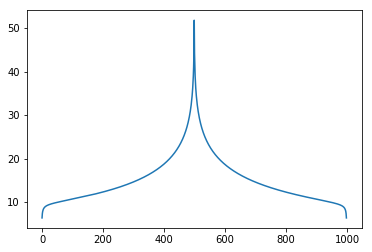

In [70]:
plot(fftconvolve(d(bins),d(bins)))

In [44]:
sum(d(bins)*dbins)

0.9827799663501802

In [ ]:
Lambda = [ getLambda(70,1) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=100,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
Lambda = [ getLambda(70,0.5) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=100,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
Lambda = [ getLambda(70,0.25) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=100,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [ ]:
Lambda = [ getLambda(70,0.0) for _ in xrange(1) ]
hist,bins=histogram(Lambda,bins=100,density=True)
bins = (bins[:-1]+bins[1:])/2
plot(bins,hist);

In [71]:
n=5
k = n**2 * circulant([-2,1]+(n-3)*[0]+[1])
L = kron(k,eye(n)) + kron(eye(n),k)

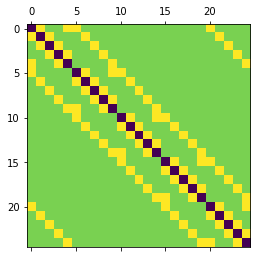

In [72]:
matshow(L)